<a href="https://colab.research.google.com/github/mazenbuk/intern/blob/main/stunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('dataset.csv')
data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


##Nama Kolom dan Deskripsi Kolom
**Age**: Umur pasien. (Numeric)<br>
**Gender**: Jenis kelamin pasien. (Categorical)<br>
**Air Pollution**: Tingkat paparan polusi udara yang dialami oleh pasien. (Categorical)<br>
**Alcohol use**: Tingkat konsumsi alkohol oleh pasien. (Categorical)<br>
**Dust Allergy**: Tingkat alergi debu pasien. (Categorical)<br>
**OccuPational Hazards**: Risiko kesehatan dari pekerjaan atau lingkungan kerja pasien. (Categorical)<br>
**Genetic Risk**: Risiko genetik pasien untuk kanker. (Categorical)<br>
**chronic Lung Disease**: Keberadaan penyakit paru-paru kronis. (Categorical)<br>
**Balanced Diet**: Tingkat keberimbangan diet pasien. (Categorical)<br>
**Obesity**: Tingkat kegemukan atau obesitas pasien. (Categorical)<br>
**Smoking**: Tingkat kebiasaan merokok pasien. (Categorical)<br>
**Passive Smoker**: Tingkat paparan asap rokok dari orang lain. (Categorical)<br>
**Chest Pain**: Keberadaan nyeri dada. (Categorical)<br>
**Coughing of Blood**: Keberadaan batuk darah. (Categorical)<br>
**Fatigue**: Tingkat kelelahan. (Categorical)<br>
**Weight Loss**: Keberadaan penurunan berat badan. (Categorical)<br>
**Shortness of Breath**: Keberadaan sesak napas. (Categorical)<br>
**Wheezing**: Mengi atau suara napas berbunyi. (Categorical)<br>
**Swallowing Difficulty**: Kesulitan menelan. (Categorical)<br>
**Clubbing of Finger Nails**: Pembengkakan ujung jari. (Categorical)<br>
**Frequent Cold**: Frekuensi terjadinya pilek. (Categorical)<br>
**Dry Cough**: Keberadaan batuk kering. (Categorical)<br>
**Snoring**: Kebiasaan mendengkur. (Categorical)<br>
**Level**: Tingkat keparahan kanker (Low, Medium, High).

In [ ]:
data['Level_numeric'] = data['Level'].map({'Low': 1, 'Medium': 2, 'High': 3})

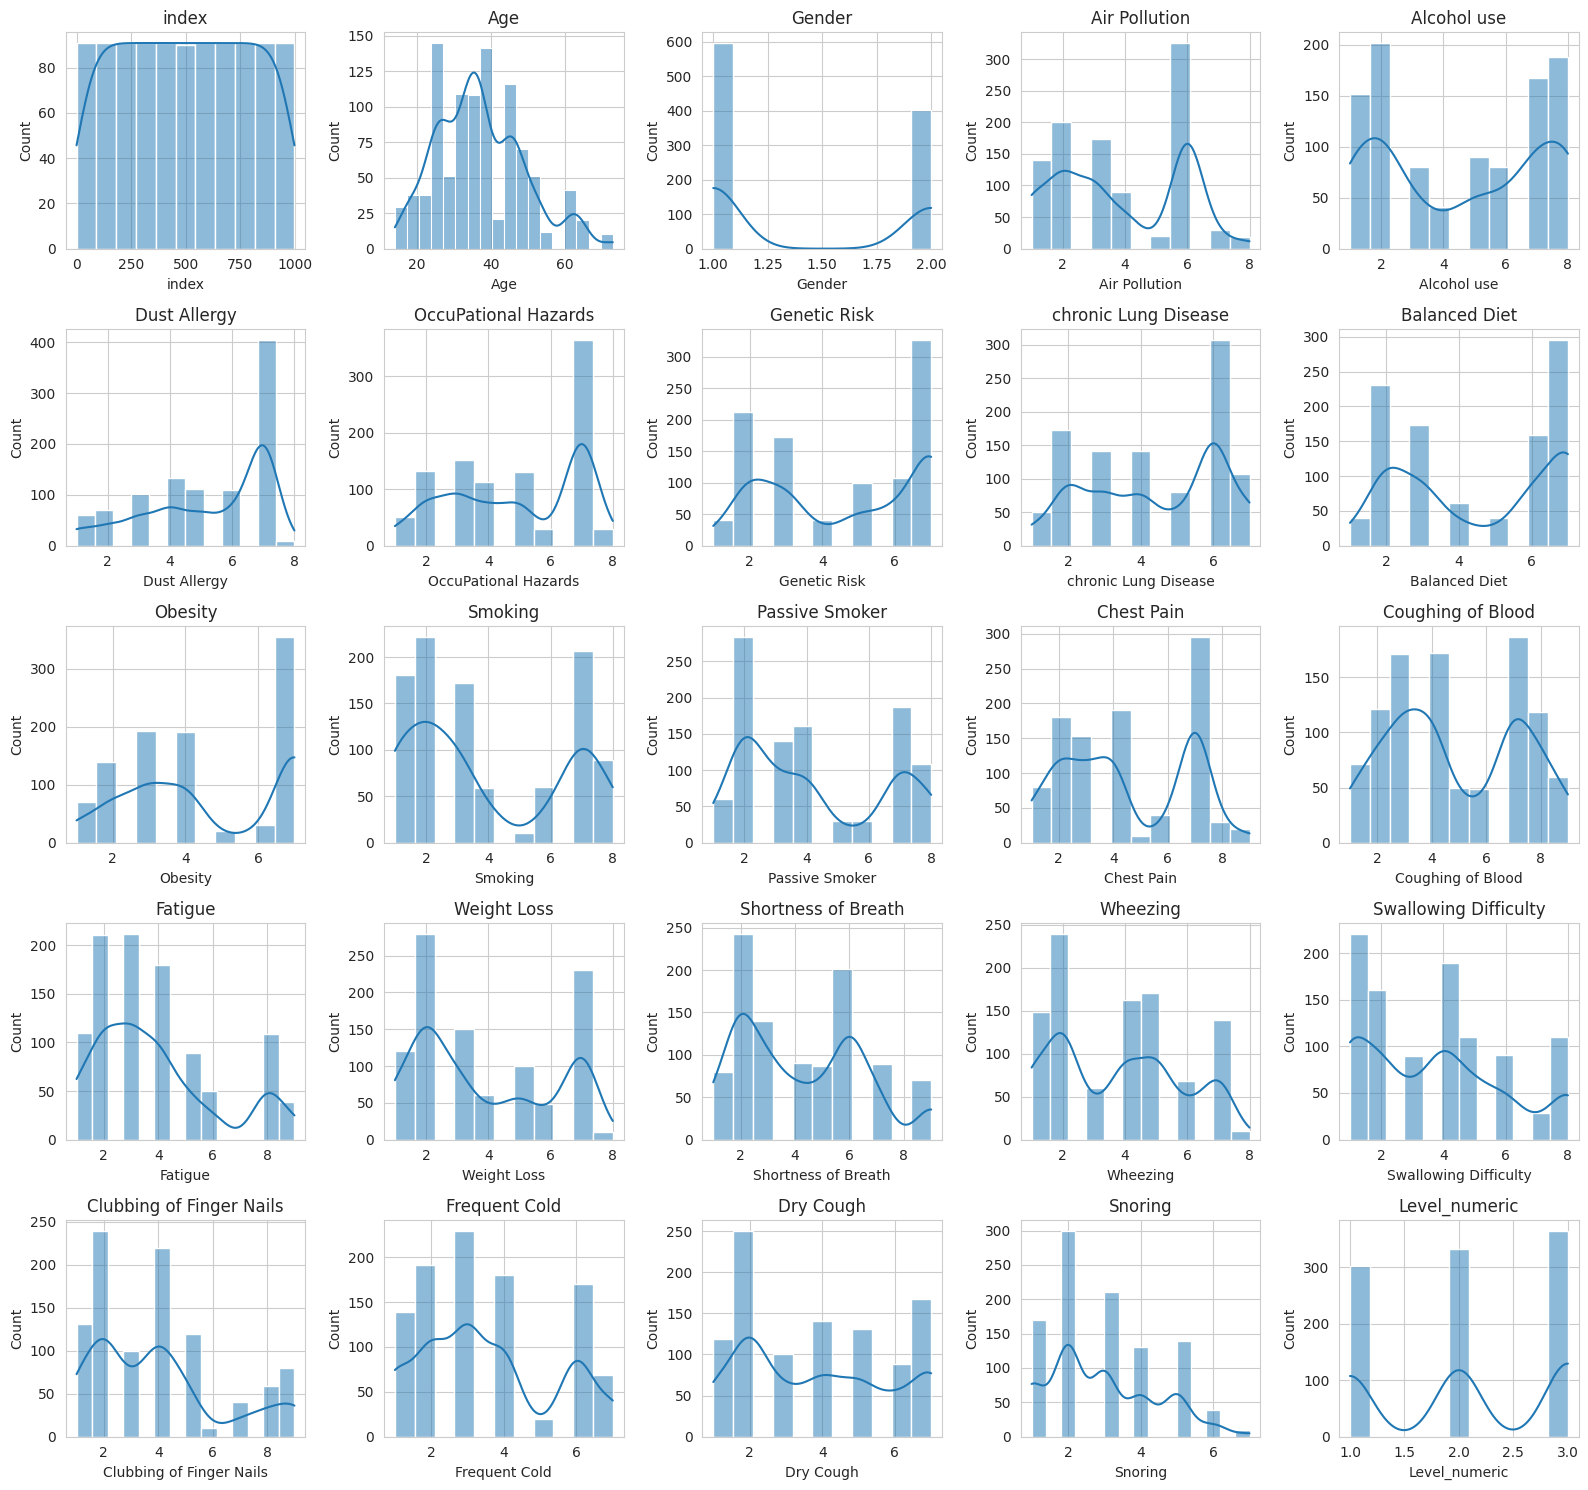

In [ ]:
data_numeric = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(16, 15))
for i, col in enumerate(data_numeric.columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(data_numeric[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

Banyak variabel seperti **Air Pollution, Alcohol use, Dust Allergy, Genetic Risk**, dan lain-lain, menunjukkan distribusi yang cukup bervariasi, dengan beberapa tampak memiliki skewness atau distribusi yang lebih berat pada nilai tertentu.<br><br>
Variabel seperti **Obesity, Coughing of Blood, dan Genetic Risk** menunjukkan sebaran yang lebih luas, menunjukkan variasi yang signifikan dalam respons pasien.<br><br>
Beberapa variabel memiliki distribusi yang cenderung lebih terpusat atau memiliki puncak yang lebih tajam, seperti **Gender dan Level_numeric**, yang mencerminkan karakteristik kategorikal dari data tersebut.

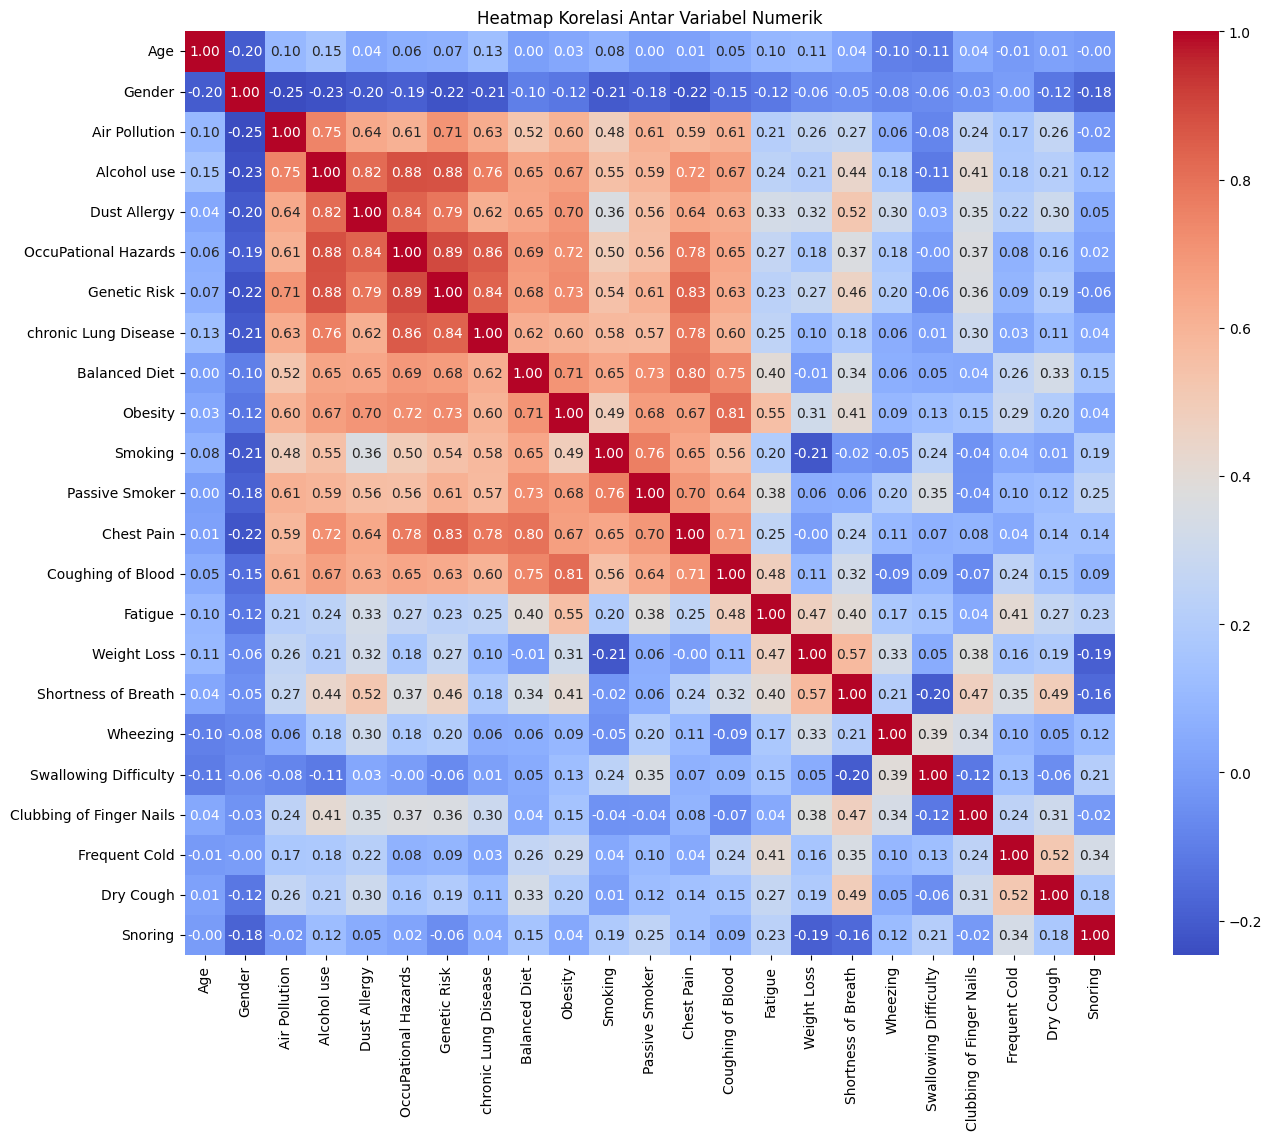

In [ ]:
fitur_numeric = data_numeric.drop(['Level_numeric', 'index'], axis=1)

correlation_matrix = fitur_numeric.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()


Beberapa fitur menunjukkan korelasi positif yang kuat antara satu sama lain, seperti Air Pollution dengan Dust Allergy, Genetic Risk dengan chronic Lung Disease, dll. Ini menunjukkan bahwa peningkatan dalam satu faktor risiko cenderung dikaitkan dengan peningkatan dalam faktor risiko lain.<br><br>
Fitur seperti Genetic Risk dan chronic Lung Disease memiliki korelasi yang signifikan dengan beberapa faktor risiko lain, menunjukkan pentingnya faktor genetik dan kondisi kesehatan kronis dalam mempengaruhi risiko kesehatan lainnya.

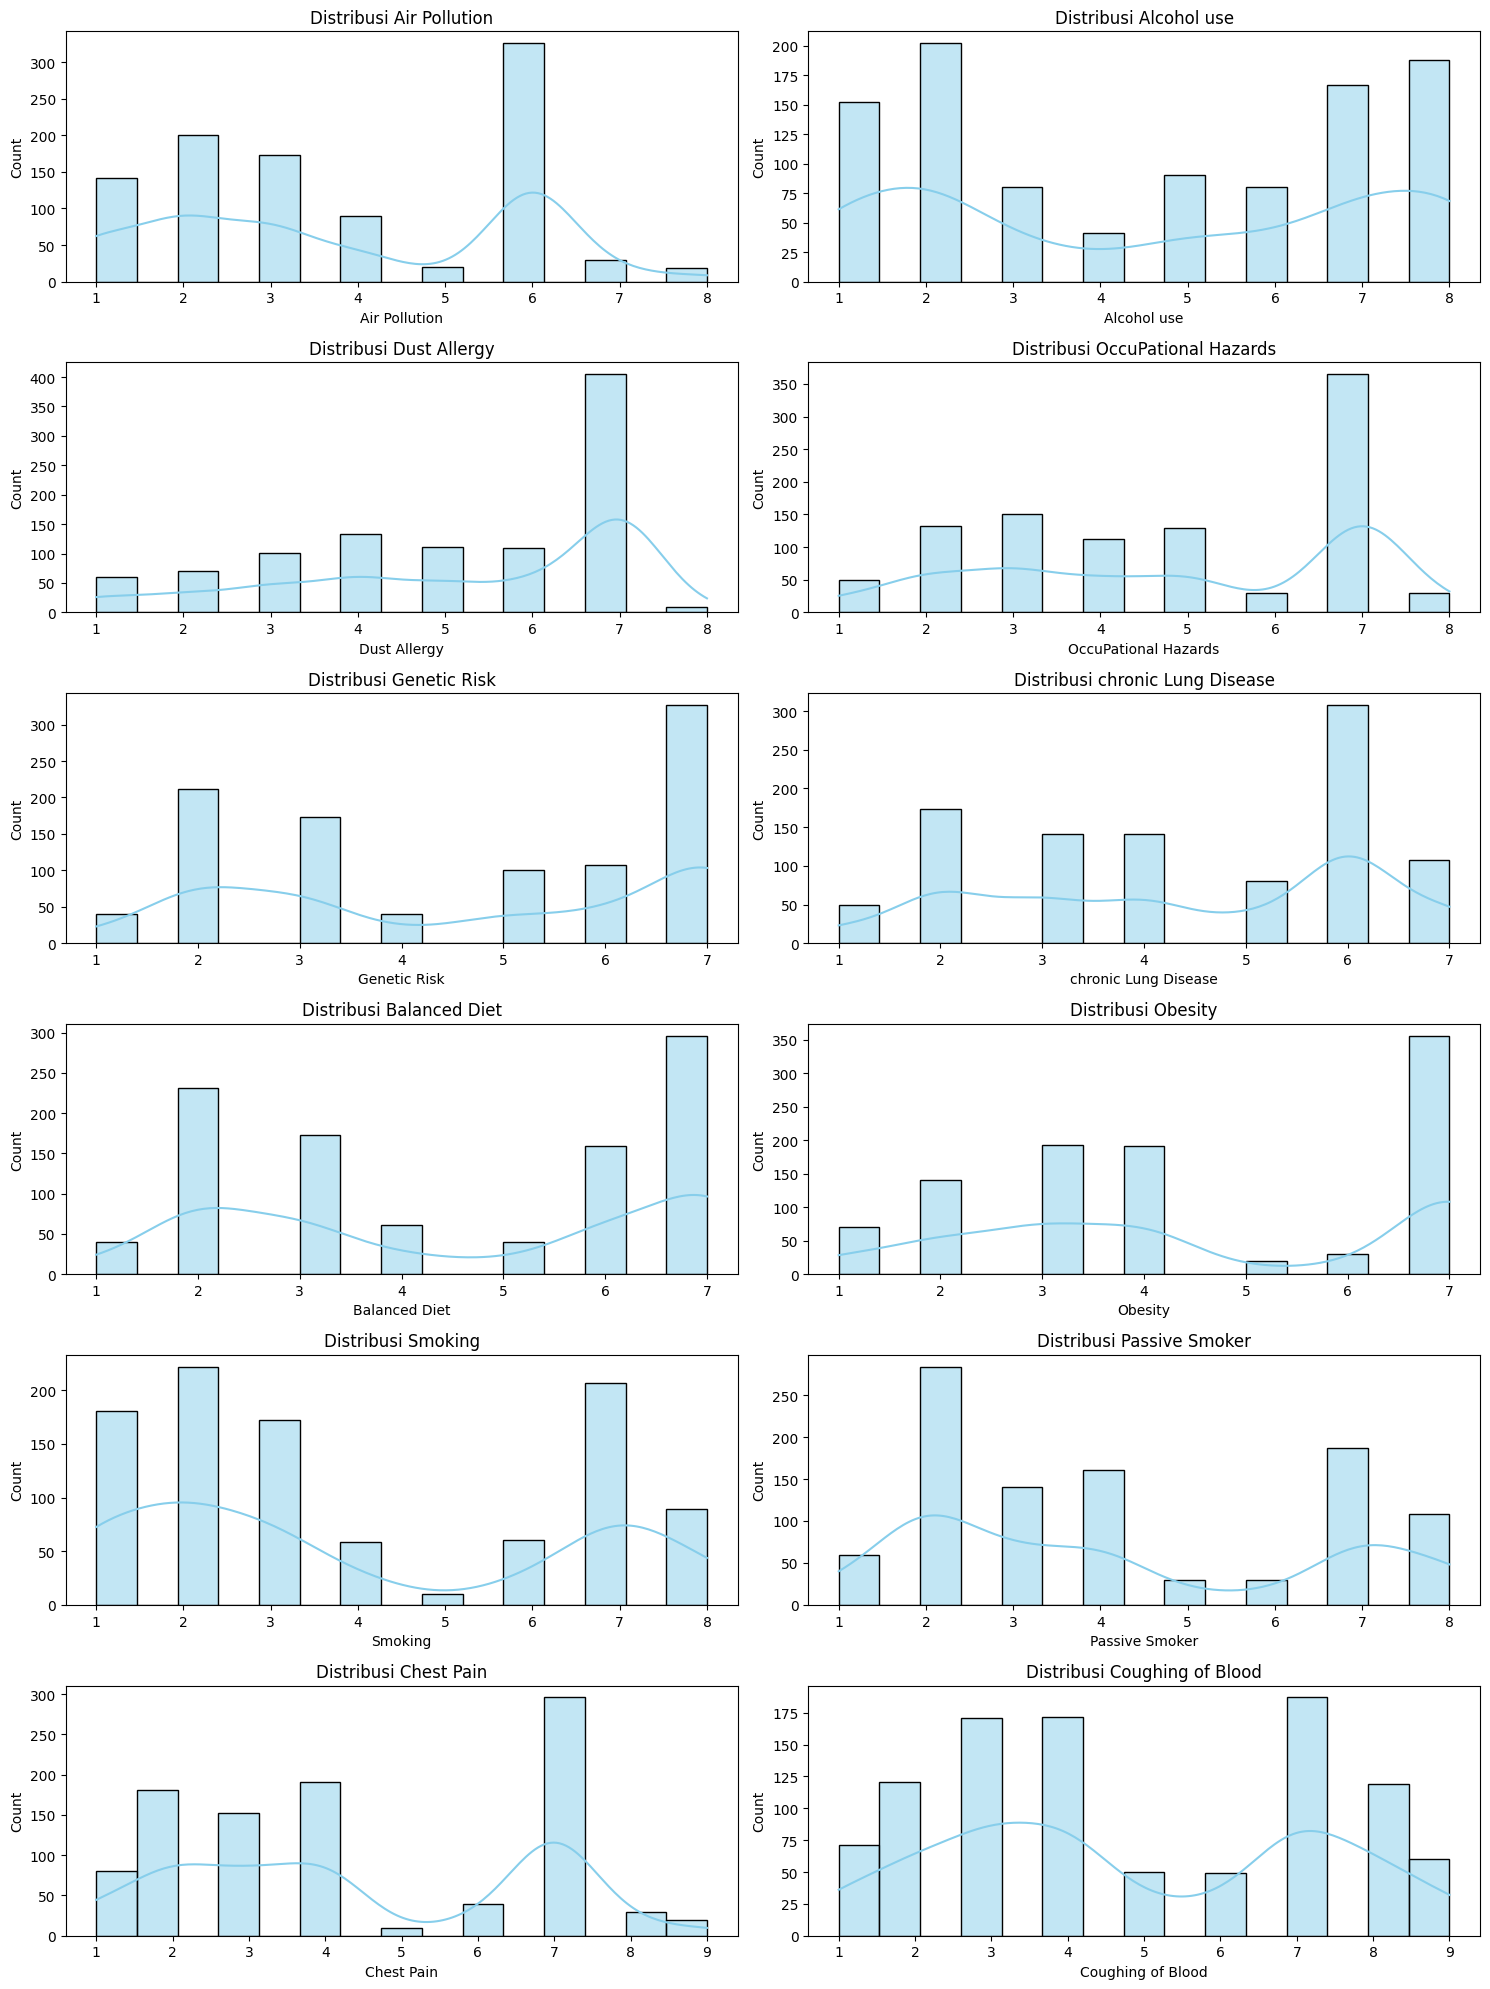

In [ ]:
fitur_merah = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
            'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity',
            'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood']

fig, axs = plt.subplots(len(fitur_merah)//2, 2, figsize=(15, 20))

for i, feature in enumerate(fitur_merah):
    row = i // 2
    col = i % 2
    sns.histplot(data[feature], kde=True, ax=axs[row, col], bins=15, color='skyblue')
    axs[row, col].set_title(f'Distribusi {feature}')

plt.tight_layout()
plt.show()


Distribusi fitur-fitur dengan korelasi tinggi menunjukkan variasi yang signifikan dalam respons pasien terhadap faktor-faktor risiko ini. Sebagian besar fitur memiliki distribusi yang cukup merata atau menunjukkan beberapa puncak, yang mengindikasikan adanya kelompok-kelompok pasien dengan tingkat paparan atau karakteristik yang berbeda.

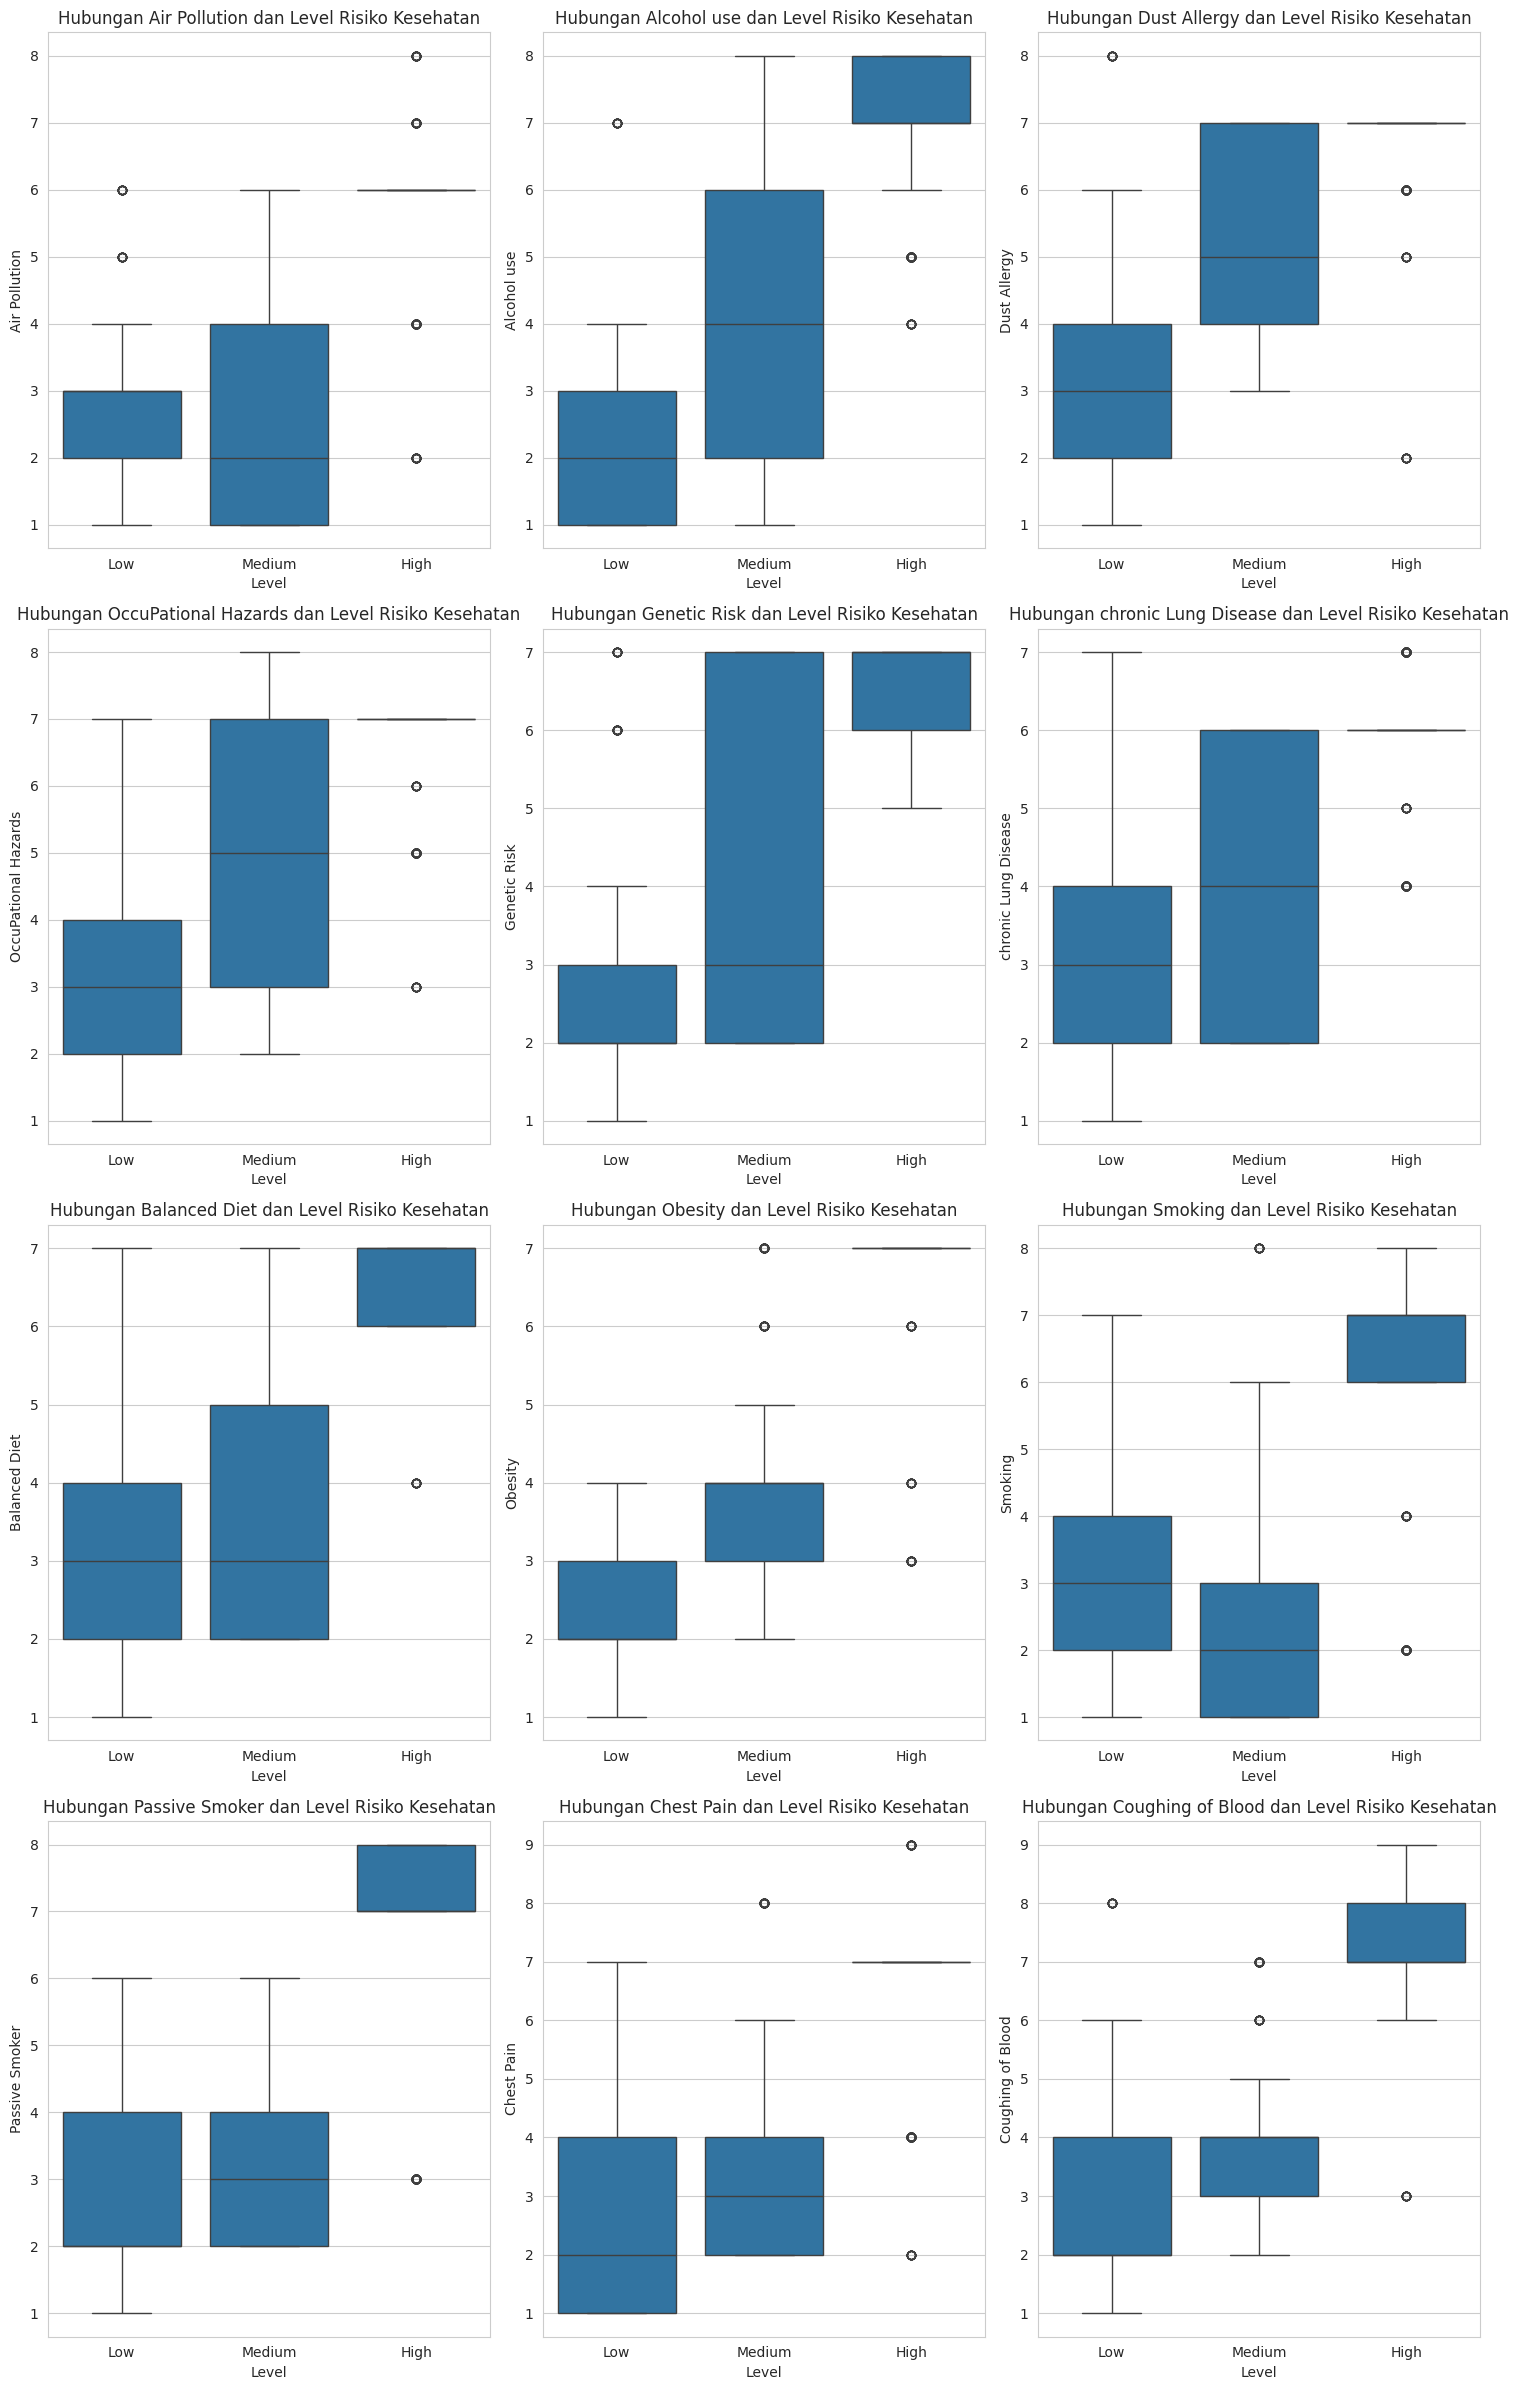

In [ ]:
# Visualisasi hubungan antara fitur-fitur dengan Level Risiko Kesehatan
fig, axs = plt.subplots(len(fitur_merah)//3, 3, figsize=(15, 24))

for i, feature in enumerate(fitur_merah):
    row = i // 3
    col = i % 3
    sns.boxplot(x='Level', y=feature, data=data, order=['Low', 'Medium', 'High'], ax=axs[row, col])
    axs[row, col].set_title(f'Hubungan {feature} dan Level Risiko Kesehatan')

plt.tight_layout()
plt.show()

Peningkatan Risiko: Untuk banyak fitur, seperti Air Pollution, Alcohol use, Dust Allergy, Genetic Risk, dan chronic Lung Disease, terdapat tren peningkatan median nilai dari kategori risiko rendah (Low) ke risiko tinggi (High). Hal ini menegaskan bahwa faktor-faktor tersebut memiliki hubungan yang kuat dengan peningkatan risiko kesehatan terkait kanker.<br><br>
Variabilitas: Boxplot menunjukkan variasi yang signifikan dalam sebaran nilai untuk masing-masing kategori risiko, yang menandakan adanya faktor-faktor lain yang juga mempengaruhi risiko kesehatan selain yang telah dianalisis.<br><br>
Konsistensi Hubungan: Hampir semua fitur yang dianalisis menunjukkan konsistensi dalam hubungannya dengan level risiko kesehatan, menunjukkan pentingnya faktor-faktor ini dalam menilai risiko kesehatan terkait kanker.

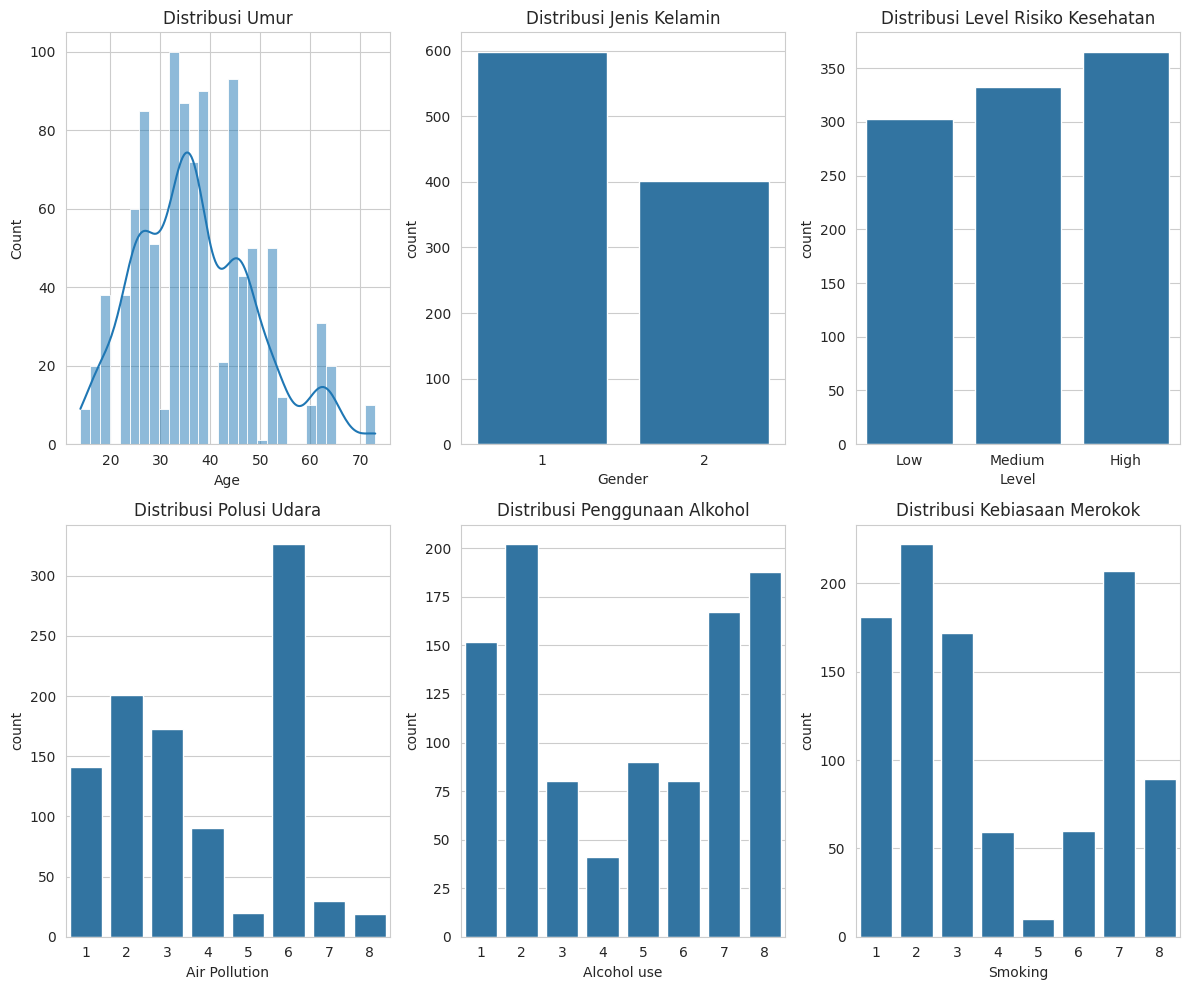

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(2, 3, figsize=(12, 10))

# Distribusi Umur
sns.histplot(data['Age'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribusi Umur')

# Distribusi Jenis Kelamin
sns.countplot(x='Gender', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Distribusi Jenis Kelamin')

# Distribusi Level Risiko Kesehatan
sns.countplot(x='Level', data=data, ax=ax[0, 2], order=['Low', 'Medium', 'High'])
ax[0, 2].set_title('Distribusi Level Risiko Kesehatan')

# Distribusi Polusi Udara
sns.countplot(x='Air Pollution', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Distribusi Polusi Udara')

# Distribusi Penggunaan Alkohol
sns.countplot(x='Alcohol use', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Distribusi Penggunaan Alkohol')

# Distribusi Kebiasaan Merokok
sns.countplot(x='Smoking', data=data, ax=ax[1, 2])
ax[1, 2].set_title('Distribusi Kebiasaan Merokok')

plt.tight_layout()
plt.show()

Distribusi Umur: Terdistribusi cukup luas, dengan puncak sekitar usia 30-an hingga 40-an tahun.<br>
Distribusi Jenis Kelamin: Lebih banyak pasien berjenis kelamin 1 (asumsi laki-laki) dibandingkan dengan jenis kelamin 2 (asumsi perempuan).<br>
Distribusi Level Risiko Kesehatan: Terdistribusi hampir merata antara risiko rendah (Low), sedang (Medium), dan tinggi (High), dengan risiko tinggi sedikit lebih banyak.<br>
Distribusi Polusi Udara: Sebagian besar pasien memiliki skor polusi udara rendah hingga menengah, namun masih ada jumlah signifikan yang mengalami paparan tinggi.<br>
Distribusi Penggunaan Alkohol: Distribusi cukup merata dari rendah hingga tinggi, menunjukkan variasi luas dalam konsumsi alkohol di antara pasien.<br>
Distribusi Kebiasaan Merokok: Mirip dengan alkohol, distribusinya menunjukkan variasi luas dari tidak merokok hingga merokok berat.

#Bikin Business Question

##Bagaimana hubungan antara gaya hidup (konsumsi alkohol dan kebiasaan merokok) dengan tingkat keparahan penyakit kanker?

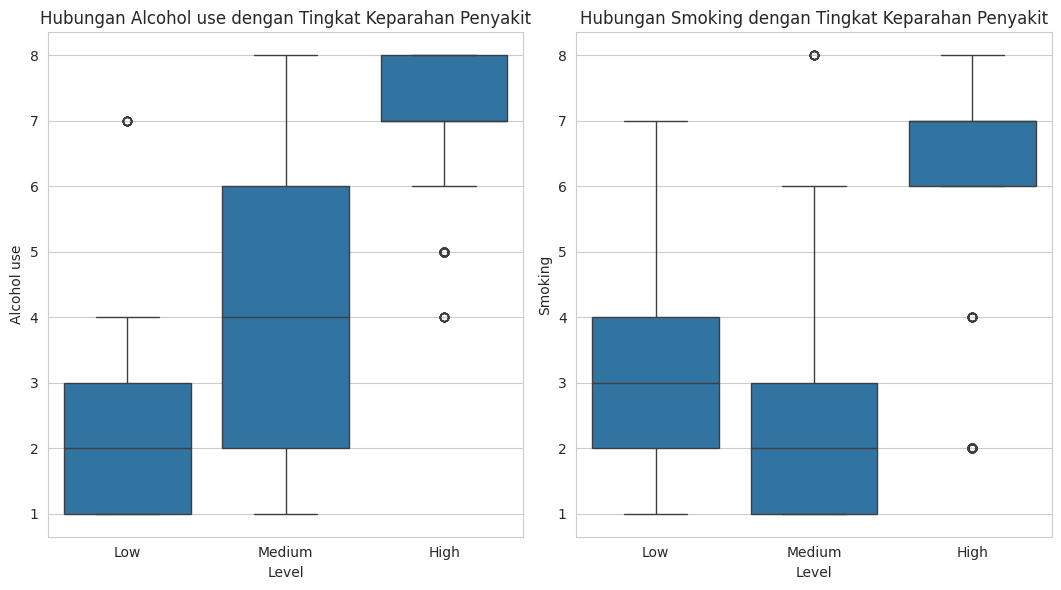

In [ ]:
plt.figure(figsize=(16, 6))

lifestyle_factors = ['Alcohol use', 'Smoking']

for i, factor in enumerate(lifestyle_factors, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Level', y=factor, data=data, order=['Low', 'Medium', 'High'])
    plt.title(f'Hubungan {factor} dengan Tingkat Keparahan Penyakit')

plt.tight_layout()
plt.show()

**Konsumsi Alkohol:** Konsumsi alkohol yang lebih tinggi tampaknya berkorelasi dengan tingkat keparahan penyakit yang lebih tinggi. Boxplot menunjukkan distribusi dan median yang lebih tinggi pada tingkat keparahan High.<br>
**Merokok:** Merokok juga menunjukkan pola yang serupa dengan dua faktor lainnya, di mana individu dengan tingkat keparahan High cenderung memiliki skor merokok yang lebih tinggi.

###Rekomendasi
- **Edukasi dan Pencegahan:** Kampanye edukasi kesehatan publik harus lebih menekankan pentingnya mengurangi konsumsi alkohol dan kebiasaan merokok sebagai upaya pencegahan penyakit kanker.
- **Kebijakan Publik:** Pemerintah mungkin perlu mempertimbangkan kebijakan yang lebih ketat terhadap pengaturan konsumsi alkohol serta merokok di tempat umum untuk mengurangi risiko kesehatan masyarakat.

##Bagaimana paparan terhadap bahaya lingkungan dan pekerjaan (seperti Air Pollution dan OccuPational Hazards) mempengaruhi tingkat keparahan penyakit kanker?

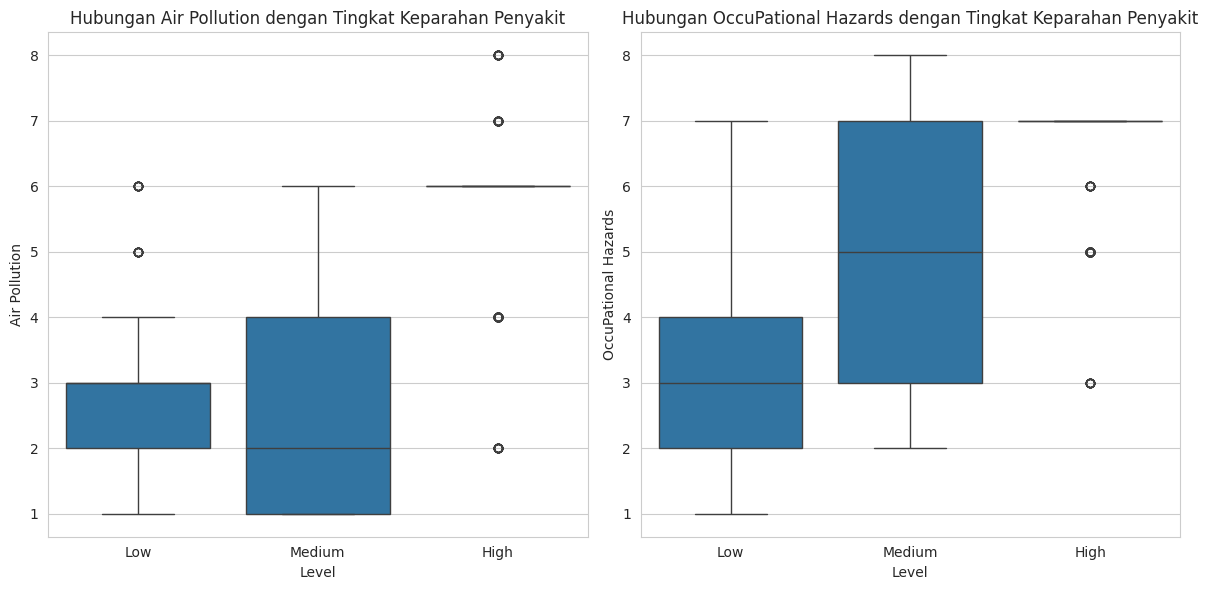

In [ ]:
plt.figure(figsize=(12, 6))
exposure_factors = ['Air Pollution', 'OccuPational Hazards']

for i, factor in enumerate(exposure_factors, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='Level', y=factor, data=data, order=['Low', 'Medium', 'High'])
    plt.title(f'Hubungan {factor} dengan Tingkat Keparahan Penyakit')

plt.tight_layout()
plt.show()

**Polusi Udara (Air Pollution):** Ada kecenderungan bahwa semakin tinggi tingkat paparan polusi udara, semakin tinggi tingkat keparahan penyakit. Hal ini ditunjukkan oleh median dan distribusi nilai yang lebih tinggi pada tingkat keparahan High.<br>
**Bahaya di Pekerjaan (OccuPational Hazards):** Pola yang serupa juga terlihat untuk bahaya pekerjaan, di mana individu dengan tingkat keparahan High cenderung melaporkan paparan bahaya pekerjaan yang lebih tinggi. Ini menunjukkan bahwa lingkungan pekerjaan mungkin memiliki peran signifikan dalam meningkatkan risiko atau tingkat keparahan penyakit.

###Rekomendasi:
**Pengaturan dan Peningkatan Standar Keselamatan Lingkungan dan Pekerjaan:** <br>Perlu ada upaya bersama antara pemerintah, industri, dan masyarakat untuk meningkatkan standar keselamatan lingkungan dan pekerjaan, termasuk pengurangan emisi polusi dan penerapan langkah-langkah keselamatan pekerja yang lebih ketat.